# Preprocessing Code

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [26]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

#### Handle Duplicates & Null

In [27]:
# Check # of duplicate values
df.duplicated().sum()

3854

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [30]:
# Check null values for specific columns
columns_to_check = ["hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
print(df[columns_to_check].isnull().sum())

hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64


# Analysis

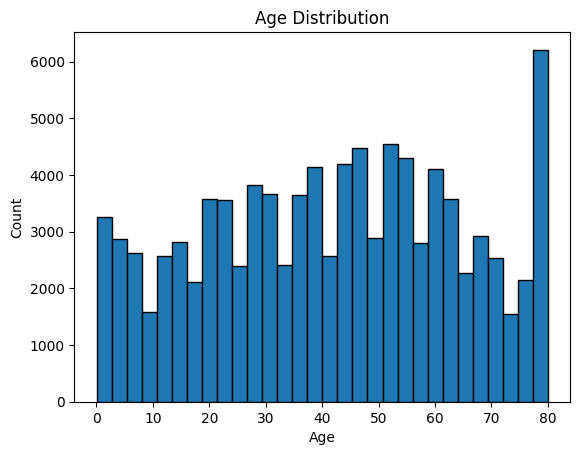

In [31]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

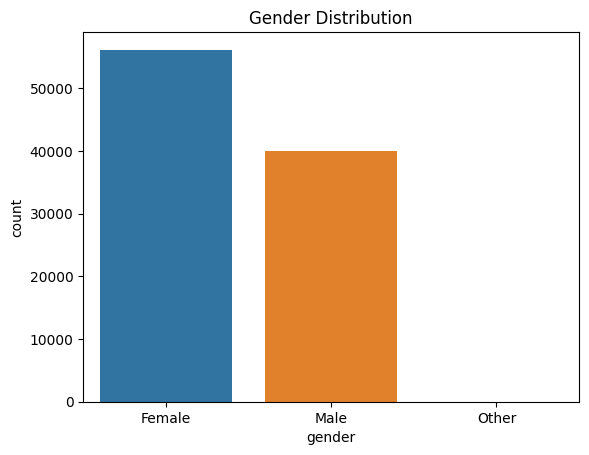

In [32]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

<ipython-input-33-ae0b3087fbd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


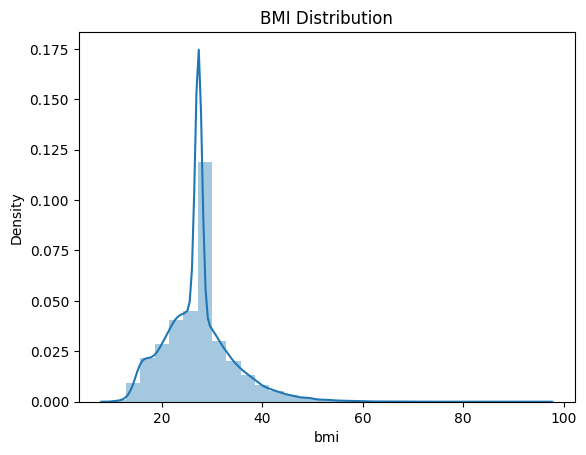

In [33]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

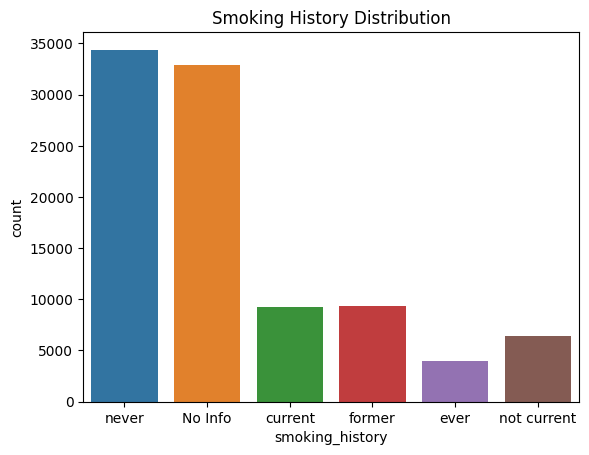

In [34]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

### Bivariative Analysis

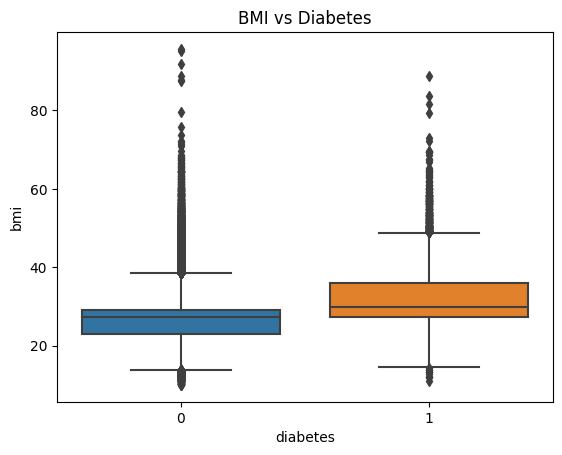

In [35]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

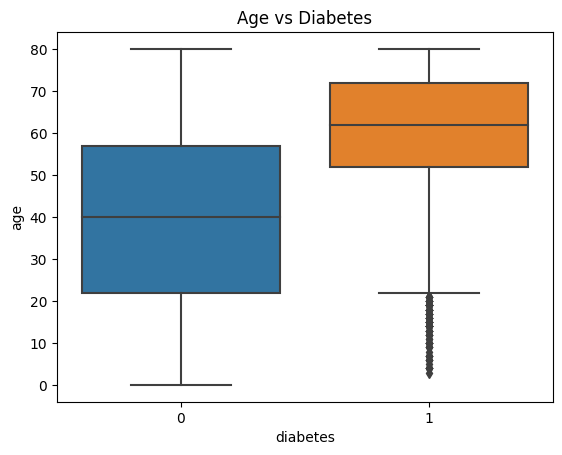

In [36]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

# Standardize 

In [37]:
# Split features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

In [38]:
# Standardize numerical features
scaler = StandardScaler()
numeric_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
X = scaler.fit_transform(X[numeric_columns])

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Steps to Build the Predictor Model:
1. Train the model - Use the preprocessed data to train a Logistic Regression classifiers.
2. Evaluate the Model - Check the model's performance using accuarcy, precision, recall, and confusion matrix.
3. Make Predictions - Use the trained model to predict outcomes on test data.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.95     19230

Confusion Matrix:
[[17365   144]
 [  669  1052]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict with Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.90      0.70      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.93      0.84      0.88     19230
weighted avg       0.96      0.97      0.96     19230

Random Forest Confusion Matrix:
[[17370   139]
 [  520  1201]]


In [42]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict with XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.98      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230

XGBoost Confusion Matrix:
[[17481    28]
 [  540  1181]]


# Prescriptive Model Design
We'll create a simple function that provides recommendations based on the prediction. This can be expanded later based on more detailed health data or expert rules.

Example Prescriptive Model (based on prediction):

In [43]:
def prescriptive_recommendation(prediction, features):
    """
    Generate a prescriptive recommendation based on the prediction (whether the individual has diabetes or not)
    and the features (health data).
    
    Parameters:
    - prediction: 0 or 1 (0: no diabetes, 1: has diabetes)
    - features: dictionary containing the health data of an individual (age, HbA1c level, blood glucose, etc.)
    
    Returns:
    - recommendation: A string containing personalized recommendations.
    """
    if prediction == 1:  # Predicted to have diabetes
        recommendation = (
            f"Based on your health data (Age: {features['age']}, HbA1c: {features['HbA1c_level']}, "
            f"Glucose Level: {features['blood_glucose_level']}), we recommend the following:\n"
            "- Regular medical checkups to monitor diabetes.\n"
            "- Monitor blood sugar levels regularly.\n"
            "- Follow a healthy diet and exercise plan.\n"
            "- Consult with a healthcare provider for personalized treatment.\n"
            "- Consider joining a diabetes management program."
        )
    else:  # Predicted NOT to have diabetes
        recommendation = (
            f"Based on your health data (Age: {features['age']}, HbA1c: {features['HbA1c_level']}, "
            f"Glucose Level: {features['blood_glucose_level']}), we recommend the following:\n"
            "- Maintain a healthy lifestyle to reduce the risk of diabetes.\n"
            "- Monitor blood sugar levels regularly.\n"
            "- Follow a balanced diet and regular exercise.\n"
            "- Regular checkups with a healthcare provider.\n"
            "- Consider adopting preventive measures like weight management and reducing stress."
        )
    
    return recommendation

## How It Works:
Input: The function takes the prediction (whether the model predicted diabetes or not) and the features of the individual (age, HbA1c, glucose level, etc.).
Recommendation Generation: Based on the prediction, the function provides a personalized recommendation for lifestyle changes or health measures.
Output: A personalized recommendation text string is returned.

In [44]:
feature_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"] 

# Manually create a dictionary for sample features
sample_features = {col: X_test[0][i] for i, col in enumerate(feature_columns)}

# Make the prediction
sample_input = X_test[0].reshape(1, -1)  # Sample input
prediction = rf_model.predict(sample_input)

# Get the recommendation
recommendation = prescriptive_recommendation(prediction[0], sample_features)
print(recommendation)

Based on your health data (Age: -1.638009301039623, HbA1c: -0.962153650138094, Glucose Level: -1.1786543839925514), we recommend the following:
- Maintain a healthy lifestyle to reduce the risk of diabetes.
- Monitor blood sugar levels regularly.
- Follow a balanced diet and regular exercise.
- Regular checkups with a healthcare provider.
- Consider adopting preventive measures like weight management and reducing stress.


# Integration
1. Integrate prediction and prescriptive logic into a single function.
2. Test the integrated model on a sample input.
3. Evaluate the system's overall performance and fine-tune if necessary.

In [49]:
def ai_agent_prediction_and_recommendation(sample_input, model, feature_columns):
    """
    Combine prediction and prescriptive recommendation into a single workflow.
    
    Parameters:
    - sample_input: A single test sample for prediction.
    - model: The trained machine learning model (e.g., Random Forest or XGBoost).
    - feature_columns: The list of feature column names for the individual.
    
    Returns:
    - recommendation: A personalized recommendation based on prediction and health features.
    """
    # Step 1: Make the prediction
    prediction = model.predict(sample_input)
    
    # Step 2: Get the corresponding features for the sample (manual mapping)
    sample_features = {col: sample_input[0][i] for i, col in enumerate(feature_columns)}
    
    # Step 3: Generate the recommendation based on the prediction and features
    recommendation = prescriptive_recommendation(prediction[0], sample_features)
    
    return recommendation

# Test the AI-Agent with the first sample from the test set
sample_input = X_test[2].reshape(1, -1)  # Reshape as needed for model input
recommendation = ai_agent_prediction_and_recommendation(sample_input, rf_model, feature_columns)

print(recommendation)

Based on your health data (Age: 0.4543360717064646, HbA1c: 1.8331557794269333, Glucose Level: 1.9990870633434477), we recommend the following:
- Regular medical checkups to monitor diabetes.
- Monitor blood sugar levels regularly.
- Follow a healthy diet and exercise plan.
- Consult with a healthcare provider for personalized treatment.
- Consider joining a diabetes management program.
